**Análise inicial dos dados de treino disponibilizados**

Importando bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Visualizando os dados:

In [25]:
train = '../input/df-train/train.csv'

In [37]:
df_treino = pd.read_csv(train)
df_treino.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


Visualizando os tipos de dados de treino:

In [28]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

Verificando dados estatísticos do dataset:

In [29]:
df_treino.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


**Velocidade de adoção:**

0 - Adotado no mesmo dia que foi listado;
1 - Adotado na primeira semana;
2 - Adotado no primeiro mês
3 - Adotado entre o segundo e terceiro mês;
4 - Sem adoção após 100 dias;

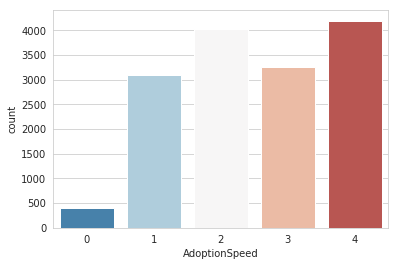

In [30]:
sns.set_style('whitegrid') #gera um gride para receber as barras do gráfico
sns.countplot(x='AdoptionSpeed',data=df_treino,palette='RdBu_r') #definindo apaleta de cores azul e vermelho

** Velocidade da adoção baseada em tipo: **
1 - Cachorro;
2 - Gato

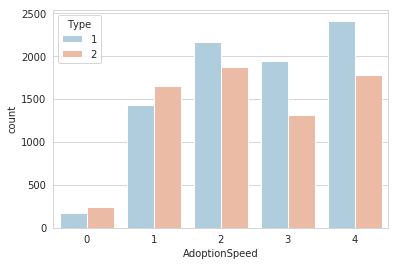

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='AdoptionSpeed',hue='Type',data=df_treino,palette='RdBu_r')

** Velocidade da adoção baseado em vacinação: **
1 = Sim;
2 = Não;
3 = Incerto

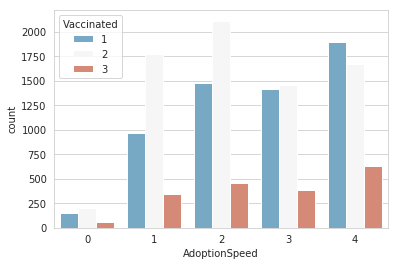

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='AdoptionSpeed',hue='Vaccinated',data=df_treino,palette='RdBu_r')

** Velocidade da adoção baseado em genero: **
1 = Masculino;
2 = Feminino;
3 = Mix (Caso seja um grupoo de pets)

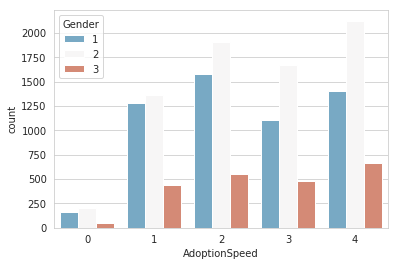

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='AdoptionSpeed',hue='Gender',data=df_treino,palette='RdBu_r')

** Velocidade da adoção baseado em tamanho: ** 
1 = Pequeno;
2 = Médio;
3 = Grande;
4 - Muito grande

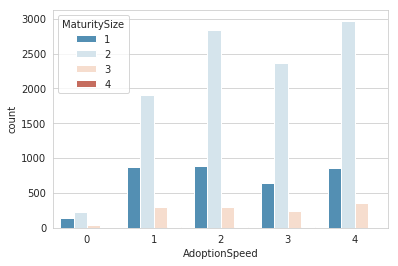

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='AdoptionSpeed',hue='MaturitySize',data=df_treino,palette='RdBu_r')

In [38]:
# Removendo variaveis para a elaboração do modelo:

df_treino.drop(['Name','RescuerID','Description','PetID','Dewormed','Fee'],axis=1,inplace=True)

In [39]:
df_treino.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Quantity,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,1,1,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,1,1,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,2,1,1,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,2,1,1,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,1,1,41326,0,3.0,2


# Testando o Modelo de regressão logistica:

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_treino.drop('AdoptionSpeed',axis=1), 
                                                    df_treino['AdoptionSpeed'], test_size=0.30, 
                                                    random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.metrics import classification_report

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)

## Avaliação do modelo

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.31      0.10      0.15       956
           2       0.28      0.39      0.33      1202
           3       0.36      0.00      0.01       990
           4       0.34      0.70      0.46      1234

   micro avg       0.32      0.32      0.32      4498
   macro avg       0.26      0.24      0.19      4498
weighted avg       0.31      0.32      0.25      4498



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Testando o Modelo de regressão linear

In [50]:
X_linear = df_treino[['Type', 'Age', 'Breed1','MaturitySize','Vaccinated','Sterilized','Health','Quantity','State','VideoAmt','PhotoAmt']]
y_linear = df_treino['AdoptionSpeed']

## Definindo as varriáveis:

In [51]:
X_linear = df_treino[['Type', 'Age', 'Breed1','MaturitySize','Vaccinated','Sterilized','Health','Quantity','State','VideoAmt','PhotoAmt']]
y_linear = df_treino['AdoptionSpeed']

## Dividindo os dados

In [52]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.4, random_state=101)

## Criando o modelo

In [53]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_linear,y_train_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
# Printando a intercepção
print(lm.intercept_)

-29.396828378131175


In [57]:
coeff_df = pd.DataFrame(lm.coef_,X_train_linear.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Type,-0.189747
Age,0.008380
Breed1,0.002775
MaturitySize,0.043153
Vaccinated,-0.007250
Sterilized,-0.193499
Health,0.169375
Quantity,0.070610
State,0.000760
VideoAmt,0.023188


## Predição do Modelo

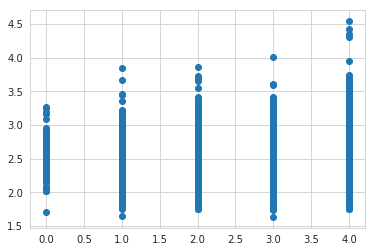

In [59]:
predictions = lm.predict(X_test_linear)
plt.scatter(y_test_linear,predictions)

# Testando Árvores de decisão

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Avaliação do modelo

In [62]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.10      0.09      0.10       116
           1       0.30      0.30      0.30       956
           2       0.33      0.34      0.33      1202
           3       0.29      0.29      0.29       990
           4       0.44      0.43      0.43      1234

   micro avg       0.34      0.34      0.34      4498
   macro avg       0.29      0.29      0.29      4498
weighted avg       0.34      0.34      0.34      4498



In [63]:
print(confusion_matrix(y_test,predictions))

[[ 11  33  23  23  26]
 [ 28 288 266 195 179]
 [ 24 256 403 257 262]
 [ 24 192 272 286 216]
 [ 24 199 253 230 528]]


# Testando Florestas aleatórias

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
rfc_pred = rfc.predict(X_test)

In [67]:
print(confusion_matrix(y_test,rfc_pred))

[[  6  24  30  19  37]
 [  6 288 309 139 214]
 [  2 236 448 205 311]
 [  1 134 289 273 293]
 [  0 124 210 137 763]]


In [68]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.40      0.05      0.09       116
           1       0.36      0.30      0.33       956
           2       0.35      0.37      0.36      1202
           3       0.35      0.28      0.31       990
           4       0.47      0.62      0.54      1234

   micro avg       0.40      0.40      0.40      4498
   macro avg       0.39      0.32      0.32      4498
weighted avg       0.39      0.40      0.38      4498

